# Specific simulation techniques #

## Simulation through plug-in ##

In serveral cases it is more convenient to exploit known analytical relations between a random variable $X$ and one or more other variables $Y_1, \dots, Y_n$, that is $X = g(Y_1, \dots, Y_n)$ for some function $g$, in order to simulate $X$ itself. This is particularly convenient when the direct simulation of $Y_i$'s is simpler than that of $X$, and the computation of $g$ is not heavy. In such cases the simulation is said to be performed through a _plug-in_ approach.

The simplest relation to be exploited is based on the sum of random variables, and it leads to the so-called _decompositional_ simulating approach. Simply put, if $X = Y_1 + \dots + Y_n$ simulating $X$ can be translated into generating separately values $y_1, \dots, y_n$ for $Y_1, \dots, Y_n$ and subsequently sum them.

This approach is on the basis of a simple simulation procedure for the binomial distribution that avoids the somehow complex procedure based on the inverse transformation technique: as any random variable $X$ following a binomial distribution of parameters $n \in \mathbb N$ and $p \in [0, 1]$ can be expressed as the sum of $n$ i.i.d. Bernoulli variables $Y_1, \dots, Y_n$ with parameter $p$, the following procedure arises.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import random
from ipywidgets import widgets, interact
from IPython.display import display, clear_output

def binomial(n, p):
    return sum([1 if random.random() <= p else 0 for i in range(n)])

<IPython.core.display.Javascript object>


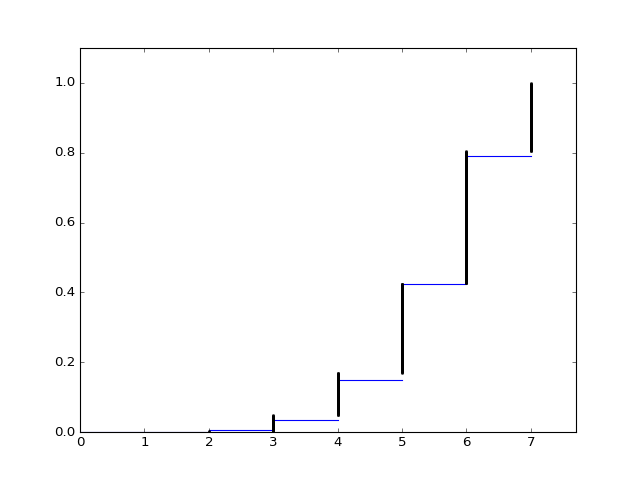

In [5]:
%matplotlib notebook

from scipy.special import binom

def ecdf(data):
    sorted = np.sort(data)
    yvals = np.arange(len(sorted))/float(len(sorted))
    return((sorted, yvals))

binom_button = widgets.Button(description='Simulate')
binom_n_selector = widgets.IntSlider(min=2, max=10, value=4, description='$n$')
binom_p_selector = widgets.FloatSlider(min=0, max=1, value=.6, description='$p$')

fig_binom_simulation, ax_binom_simulation = plt.subplots()

def binomial_simulation(n, p):
    data = [binomial(n, p) for i in range(1000)]
    vals = np.arange(0, n+1)
    probs = [binom(n, i) * p**i * (1-p)**(n-i) for i in vals]
    cum_probs = np.cumsum(probs)

    clear_output()
    ax_binom_simulation.clear()
        
    for line in zip(zip(vals[:-1], vals[1:]), cum_probs):
        ax_binom_simulation.plot(line[0], [line[1]]*2, 'b')
            
    x_ecdf, y_ecdf = ecdf(data)
    ax_binom_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    plt.ylim(0, 1.1)
    plt.xlim(0, max(vals)*1.1)
    
    display(fig_binom_simulation)


binom_button.on_click(lambda b: binomial_simulation(binom_n_selector.value, binom_p_selector.value))
display(binom_button)

interact(binomial_simulation, n=binom_n_selector, p=binom_p_selector)

The same approach can be applied to a random variable $X$ following a Gamma distribution, whose density depends from two parameters $k \in \mathbb N$ and $\lambda \in \mathbb R^+$ as follows

$$
f_X(x) = \frac{\lambda^k}{\Gamma(k)} x^{k-1} \mathrm e^{-\lambda x} \mathrm I_{\mathbb R^+}(x),
$$

where $\Gamma(z) = \int_0^{+\infty} x^{z-1} \mathrm e^{-x} \mathrm d x$ is the gamma function, characterized by the property $\Gamma(z+1) = z \Gamma(z)$ and thus representing an extension of the factorial function defined for all positive real numbers. As it can be shown that $X$ has the same distribution of the sum of $k$ independent exponential random variables with paramter $\lambda$, the following panel implements a routine that simulates the gamma distribution using the decompositional approach and tests it.

<IPython.core.display.Javascript object>


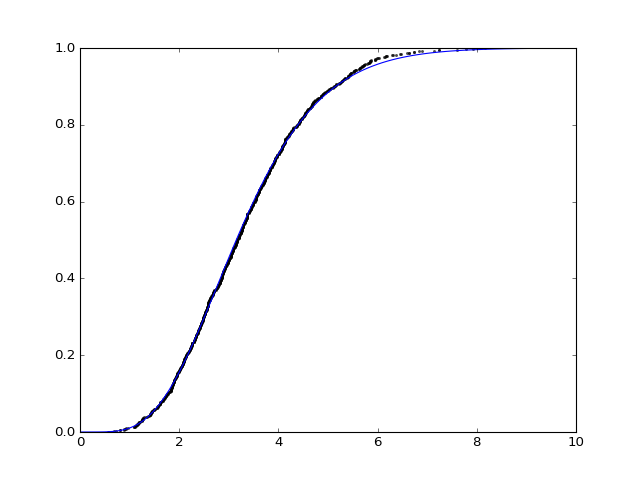

In [19]:
from scipy import stats

def gamma(k, _lambda):
    return sum([-1/_lambda * math.log(random.random()) for i in range(int(k))])

gamma_button = widgets.Button(description='Simulate')
gamma_k_selector = widgets.IntSlider(min=2, max=10, value=4, description='$k$')
gamma_l_selector = widgets.FloatSlider(min=0, max=4, value=.6, description='$\\lambda$')

fig_gamma_simulation, ax_gamma_simulation = plt.subplots()

def gamma_simulation(k, _lambda):
    data = [gamma(k, _lambda) for i in range(1000)]
    vals = np.arange(0, 10, .1)

    clear_output()
    ax_gamma_simulation.clear()
            
    x_ecdf, y_ecdf = ecdf(data)
    ax_gamma_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    
    cdfs = map(lambda x: stats.gamma.cdf(x, k, scale=1/_lambda), vals)
    ax_gamma_simulation.plot(vals, cdfs, 'b')
    
    display(fig_gamma_simulation)


gamma_button.on_click(lambda b: gamma_simulation(gamma_k_selector.value, gamma_l_selector.value))
display(binom_button)

interact(gamma_simulation, k=gamma_k_selector, _lambda=gamma_l_selector)

More in general, any relation among random variables can be exploited. Consider for instance the fact that a specification of a geometric distribution of parameter $p \in (0, 1]$ can be interpreted as the number of consecutive insuccesses in a sequence of independent Bernoulli experiments of parameter $p$ before the first success. Therefore, a generated value, say $n$, for a geometric random variable can be converted into a sequence of $n$ values, that is $n-1$ zeroes followed by a one. The use of a python generator allow to obtain an elegant implementation of this technique.

<IPython.core.display.Javascript object>


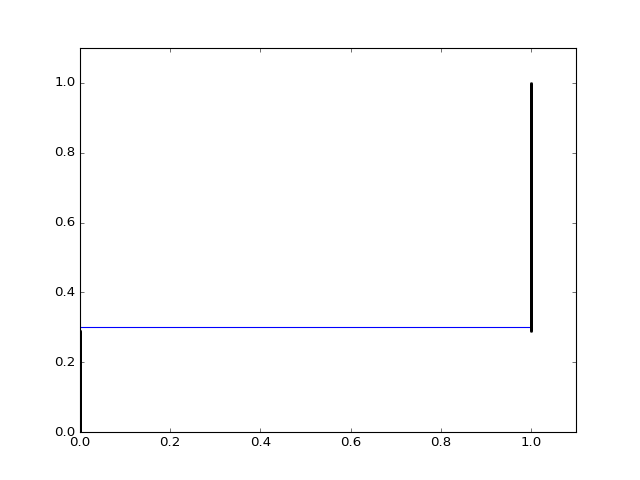

In [72]:
def bernoulli(p):
    while True:
        insuccesses = (int) (math.log(random.random())/math.log(1-p))+1
        for i in range(insuccesses-1):
            yield 0
        yield 1

bernoulli_button = widgets.Button(description='Simulate')
bernoulli_p_selector = widgets.FloatSlider(min=0, max=1, value=0.25)

fig_bernoulli_simulation, ax_bernoulli_simulation = plt.subplots()

def bernoulli_simulation(p):
    bg = bernoulli(p)
    data = [bg.next() for i in range(1000)]
    vals = (0, 1)
    probs = (1-p, p)
    cum_probs = np.cumsum(probs)

    clear_output()
    ax_bernoulli_simulation.clear()
        
    for line in zip(zip(vals[:-1], vals[1:]), cum_probs):
        ax_bernoulli_simulation.plot(line[0], [line[1]]*2, 'b')
            
    x_ecdf, y_ecdf = ecdf(data)
    ax_bernoulli_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    plt.ylim(0, 1.1)
    plt.xlim(0, max(vals)*1.1)
    
    display(fig_bernoulli_simulation)


bernoulli_button.on_click(lambda b: bernoulli_simulation(bernoulli_p_selector.value))
display(bernoulli_button)

interact(bernoulli_simulation, p=bernoulli_p_selector)
    

Another example of relation to be exploited for optimizing a simulation procedure is that linking the exponential and Poisson distributions. Indeed, in a Poisson process of parameter $\lambda$ the inter-occurrence time of events is distributed according to an exponential distribution of parameter $\lambda$, and the number of occurrences of events in an interval of unitary length follows a Poisson distribution having the same parameter. Thus, instead of relying on the trivial application of the inverse transformation technique, the Poisson distribution can be simulated through repeated generation of exponential inter-occurrence times until getting an event whose occurrence time exceeds 1. In formal terms, denoting by $n$ the specification of the Poisson variable and with $e_1, \dots, e_n, \dots$ a succession of specifications of the exponential variables in the related process,

$$
n = \max_{m \in \mathbb N} \left\{ \sum_{i=1}^m e_i \leq 1 \right\}.
$$

Replacing $e_i$ with the corresponding expression simulating the exponential random variable in funtion of a specification $u_i$ of a uniform distibution over $[0, 1]$ we obtain

$$
n = \max_{m \in \mathbb N} \left\{ \sum_{i=1}^m -\frac{1}{\lambda} \ln u_i \leq 1 \right\},
$$

and the latter expression is equivalent to

$$
n = \max_{m \in \mathbb N} \left\{ \prod_{i=1}^m u_i \geq \mathrm e^{-\lambda} \right\}
  = \min_{m \in \mathbb N} \left\{ \prod_{i=1}^m u_i < \mathrm e^{-\lambda} \right\} - 1.
$$

Note how the last form is suitable for an algorithmic implementation, in that the only way to acknowledge that the maximum value $m$ such that the product of $m$ terms exceeds a threshold has been reached is through detection of the first time that this threshold is not exceeded. Note also that the implementation should rely on the fact that $\prod_{i=1}^0 u_i = 1$, as a counterpart of $\sum_{i=1}^0 e_i = 0$.

<IPython.core.display.Javascript object>


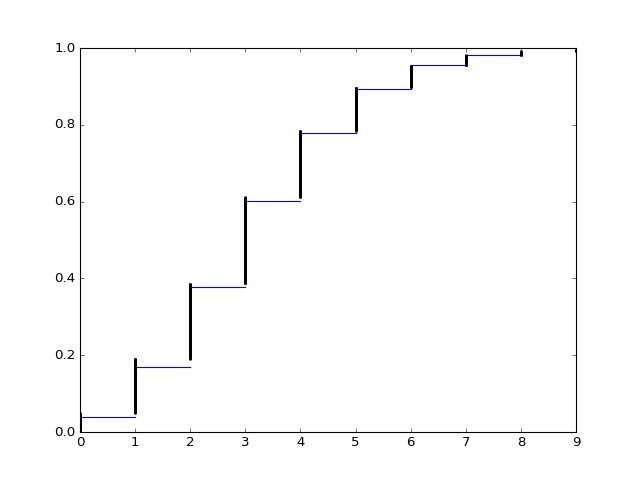

In [78]:
def poisson(_lambda):
    n = 0
    u = 1
    while u >= math.exp(-_lambda):
        u *= random.random()
        n += 1
    return n-1

poiss_button = widgets.Button(description='Simulate')
poiss_l_selector = widgets.FloatSlider(min=0.01, max=10, value=3, description='$\lambda$')

fig_poiss_simulation, ax_poiss_simulation = plt.subplots()

def poisson_simulation(_lambda):
    data = [poisson(_lambda) for i in range(1000)]
    max_x = 9
    vals = np.arange(0, max_x)
    probs = [math.exp(-_lambda)]
    for i in range(1, max_x+1):
        probs.append(probs[-1]* _lambda /i)
    cum_probs = np.cumsum(probs)

    clear_output()
    ax_poiss_simulation.clear()
        
    for line in zip(zip(vals[:-1], vals[1:]), cum_probs):
        ax_poiss_simulation.plot(line[0], [line[1]]*2, 'b')
            
    x_ecdf, y_ecdf = ecdf(data)
    ax_poiss_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    plt.ylim(0, 1)
    plt.xlim(0, max_x)
    
    display(fig_poiss_simulation)


poiss_button.on_click(lambda b: poisson_simulation(poiss_l_selector.value))
display(poiss_button)

_ = interact(poisson_simulation, _lambda=poiss_l_selector)

There are several distributions explicitly defined as specific functions of other distributions: in these cases, applying the plug-in principle is straightforward. There is a special set of distributions describing the efficiency of usual estimators when dealing with a normal population, such as the Student's t distribution (which we met as an introductory example to the course and which was actually simulated via plug-in) or the chi-squared distribution. The latter is described as the distribution of the sum of $k$ squared standard normal random variables, where $k \in \mathbb N$ parametrizes the distribution. This definition suggests the following implementation for a simulating algorithm, based on the approximated generation of standard normal variables introduced in the previous lecture.

<IPython.core.display.Javascript object>


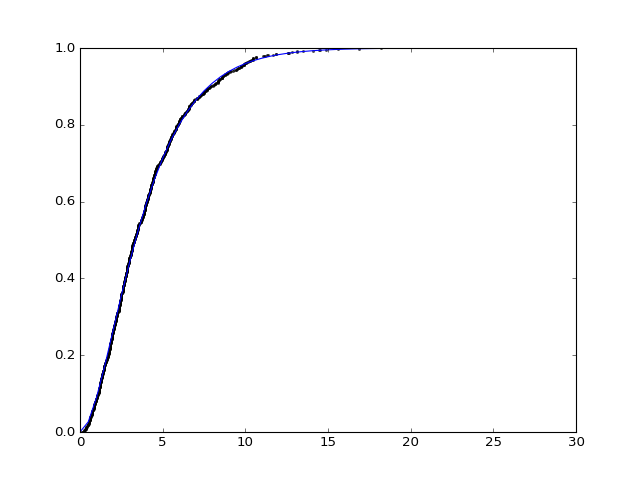

In [143]:
def std_random_appr():
    return sum([random.random() for i in range(12)]) - 6

def chi_square(k):
    return sum([std_random_appr()**2 for i in range(int(k))])

chisq_button = widgets.Button(description='Simulate')
chisq_k_selector = widgets.IntSlider(min=1, max=10, value=4, description='$k$')

fig_chisq_simulation, ax_chisq_simulation = plt.subplots()

def chi_square_simulation(k):
    data = [chi_square(k) for i in range(1000)]
    vals = np.arange(0, 30, .5)

    clear_output()
    ax_chisq_simulation.clear()
            
    x_ecdf, y_ecdf = ecdf(data)
    ax_chisq_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    
    cdfs = map(lambda x: stats.chi2.cdf(x, k), vals)
    ax_chisq_simulation.plot(vals, cdfs, 'b')
    
    display(fig_chisq_simulation)


chisq_button.on_click(lambda b: chi_square_simulation(chisq_k_selector.value))
display(chisq_button)

_ = interact(chi_square_simulation, k=chisq_k_selector)

## Compositional method ##

Instead of simulating a given distribution, in several occasions arises the need of simulating a _mixture_ of distributions. More precisely, one wants to pick at random one among $n$ distributions (defined over a same domain) and simulate it. Think for instance to a video game programmer who aims at generating a set of characters who can be, say, humans, trolls, or elves, and each of these populations is characterized by a specific variety in physical qualities such as for instance gender, height and so on. In these cases, the so-called _compositional method_ comes to the rescue: it consists simply in using one of the simulation algorithms for discrete distributions in order to preliminary select one of the populations to be subsequently simulated.

The following cell implements a general version of this technique, accepting as first argument a list of function each simulating the different populations and as second argument another list containing the probability values of a discrete distribution over the populations. The latter distribution is simulated using the basic approach introduced in Lecture 3.

In [ ]:
def simulate_discrete_rv(vals, probs, n=1):
    cum_probs = np.cumsum(probs)
    result = []
    for k in range(n):
        u = random.random()
        i = 0
        while u >= cum_probs[i]:
            i += 1
        result.append(vals[i])
    return result if n > 1 else result[0]

def mixture(pops, weights, n=1):
    s = sum(weights)
    if s != 1:
        weights = np.array(weights) / s
        
    ind = simulate_discrete_rv(range(len(weights)), weights, n)
    return [pops[i]() for i in ind] if n>1 else pops[ind]()

In order to test this implementation, let's consider a mixture of three normal distributions: as a first step, we implement two functions that obtain the density and c.d.f. of a mixture from those of their components:

<IPython.core.display.Javascript object>


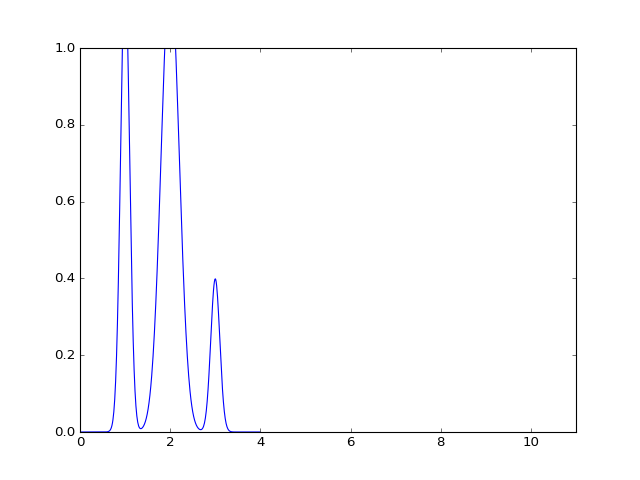

In [164]:
def mixture_cdf(x, mus, sigmas):
    return sum(np.array([stats.norm.cdf(x, *p)
                         for p in zip(mus, sigmas)])*weights)

def mixture_pdf(x, mus, sigmas):
    return sum(np.array([stats.norm.pdf(x, *p)
                         for p in zip(mus, sigmas)])*weights)

mus = (1, 2, 3)
sigmas = (.1, .2, .1)
weights = (.3, .6, .1)

plt.figure()
vals = np.arange(0, 4, 0.01)
plt.plot(vals, map(lambda x: mixture_pdf(x, mus, sigmas), vals))
plt.show()

The only missing tool is a function simulating a generic normal distribution: we can resort to the one introduced at the end of Lecture 4, which in turn relies on the previously used approximated method for the standard normal distribution.

In [145]:
def gen_normal(mu, sigma):
    z = std_random_appr()
    return mu + sigma * z

mixture(map(lambda p: (lambda: gen_normal(*p)), zip(mus, sigmas)),
        weights, 10)

[1.5349802705606732,
 2.03369682720166,
 1.010061456822578,
 2.5268213652288525,
 2.102624127083847,
 1.9883270447716723,
 1.090887177547244,
 2.129834310706286,
 1.8989867616114329,
 2.0582829711447173]

We have now everything in place to perform a simulation of the gaussian mixture: the following panel tests the implementation, generating a new sample at each button press and superimposing as usual the graphs of theorical and empirical c.d.f.s.

<IPython.core.display.Javascript object>


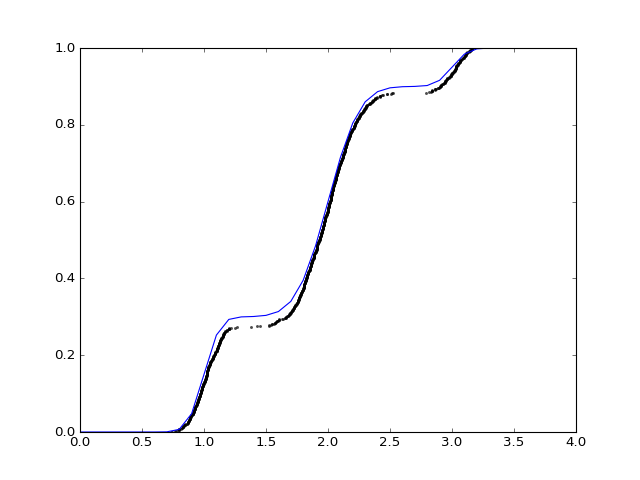

In [157]:
mixture_button = widgets.Button(description='Simulate')
fig_mixture_simulation, ax_mixture_simulation = plt.subplots()

def mixture_simulation(b):
    ax_mixture_simulation.clear()
    clear_output()

    data = mixture(map(lambda p: (lambda: gen_normal(*p)), zip(mus, sigmas)),
                   weights, 1000)

    x_ecdf, y_ecdf = ecdf(data)
    ax_mixture_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)

    vals = np.arange(0, 4, .1)
    cdfs = map(mixture_cdf, vals)
    ax_mixture_simulation.plot(vals, cdfs, 'b')
    display(fig_mixture_simulation)
    

mixture_simulation(mixture_button)
mixture_button.on_click(mixture_simulation)
display(mixture_button)


## Acceptance-rejection methods ##

Let $X$ denote a discrete random variable which we are interested in simulating. Suppose that we don't know how to do it, or how to do it efficiently. Suppose also that we are able, instead, to simulate another discrete random variable $Y$ defined over the same domain of $X$. Denote $p_i = \mathrm P(X=i)$, $q_i = \mathrm P(Y=i)$ for all meaningful $i$ and assume that $c \in \mathbb R$ is a constant such that $p_i/q_i \leq c$ for all $i$ such that $p_i > 0$. Consider the following algorithm:

- do
  - $i$ = simulate($Y$)
  - $u$ = random()
  - accept = $\left( u < \frac{p_i}{c q_i} \right)$
- while(!accept)
- return $i$

**Theorem** The repeated invocation of this algorithm, the set of returned values is indistinguishable from a sample drawn from $X$, that is, denoted $X_G$ the random variable accounting for the values returned by the algorithm, for each $i$ we have $\mathrm P(X_G=i) = p_i$. Moreover, the number of iterations in the above loop follows a geometric distribution of parameter $1/c$.

_Proof_ For a generic $i$ we have

$$
\mathrm P(Y=i \cap \text{the loop ends}) = \mathrm P(Y=i) \mathrm P(\text{the loop ends}|Y=i)
= q_i \frac{p_i}{c q_i} = \frac{p_i}{c}.
$$

Now, the number of iterations before the loop ends is obviously described by a geometric distribution whose parameter equals the probability that after one iteration the loop ends. The latter probability amounts to

$$
\mathrm P(\text{the loop ends}) = \sum_i \mathrm P(Y=i \cap \text{the loop ends})
= \sum_i \frac{p_i}{c} = \frac{1}{c}.
$$

Finally,

$$\begin{align}
\mathrm P(X_G=i) &= \sum_{n=1}^{+\infty} P(Y=i \cap \text{the loop ends after $n$ iterations}) \\
                 &= \sum_{n=1}^{+\infty} \left( 1 - \frac{1}{c} \right)^{n-1} \frac{p_i}{c} \\
                 &= \frac{p_i}{c} \sum_{m=0}^{+\infty} \left( 1 - \frac{1}{c} \right)^m \\
                 &= \frac{p_i}{c} \frac{1}{1-\left( 1 - \frac{1}{c} \right)} = p_i,
\end{align}$$

where the infinite sum converges because $p_i/q_i \leq c$ is equivalent to $\sum_i p_i \leq c \sum_i q_i$ and thus $c \geq 1$: this ensures that $\left| 1 - \frac{1}{c} \right| = 1 - \frac{1}{c}$, thus the convergence criterion will be $1 - \frac{1}{c} < 1$ or, equivalently, $c > 0$, which is implied by $c \geq 1$. ∎

Note that, being the number of loop iterations distributed according to a geometric law of parameter $\frac{1}{c}$, the average number of terations will be $c$ and thus it will be convenient to choose such values as small as possible.

As an example, consider the following probability mass function of a random variable $X$:

$$
\mathrm P(X=i) = \frac{(1-p)^i}{(- \ln p) i} \mathrm I_{\mathbb N \backslash \{ 0 \}}(i) =: p_i,
$$

for $p \in (0, 1)$. Such a variable is said to follow a _logarithmic_ distribution, taking its name from the fact that the analytical form of the probability mass function is linked to the McLaurin expansion a particular logarithmic function. Indeed, if $f(q) = \ln (1-q)$,

$$\begin{align}
f^{(i)}(q) = -(i-1)!(1-q)^{-i} \\
f^{(i)}(0) = -(i-1)! \\
f(0) = 0
\end{align}$$

Thus the McLaurin expansion of $f$ is

$$
\ln(1-q) = \sum_{i=1}^{+\infty} \frac{-(i-1)!}{i!}q^i = \sum_{i=1}^{+\infty} -\frac{q^i}{i}.
$$

Now, substituting $p = 1 - q$ in the above relation gives as result

$$
-\ln p =  \sum_{i=1}^{+\infty} \frac{(1-p)^i}{i},
$$

so that the $\sum_{i=1}^{+\infty}p_i = 1$.

In order to simulate the logarithmic distribution through the acceptance-rejection method, it is necessary to find out the equivalent of the distribution of $Y$ and the value for $c$ in the method formulation. Note that

$$
p_i = \frac{(1-p)^i}{(-\ln p) i} = \frac{1}{-\ln p} \frac{1-p}{i} (1-p)^{i-1},
$$

so that $\frac{1}{-\ln p}$ emerges as a possible value for $c$. Moreover, it is easy to show that

$$
\frac{1-p}{i} \leq p \leftrightarrow p \geq \frac{1}{2}.
$$

Thus, assuming that $p \geq \frac{1}{2}$ holds we have $p_i \leq c p(1-p)^{i-1} =: c q_i$, with $q_i$ identifies a geometric distribution with parameter $p$. In order to finalize the simulation algorithm, note that

$$
\frac{p_i}{c q_i} = \frac{(1-p)^i}{(-ln p) i} \frac{-\ln p}{p(1-p)^{i-1}} = \frac{1-p}{ip}.
$$

Thus the logarithmic distribution can be simulated through the following algorithm:

- do
  - $i = \left\lceil \frac{\ln \text{random()}}{\ln (1-p)} \right\rceil$
  - accept $= \left( \text{random()} \leq \frac{1-p}{ip} \right)$
- while !accept
- return $i$

Note also that the average number of iterations of this algorithm will be $-\ln p$.

<IPython.core.display.Javascript object>


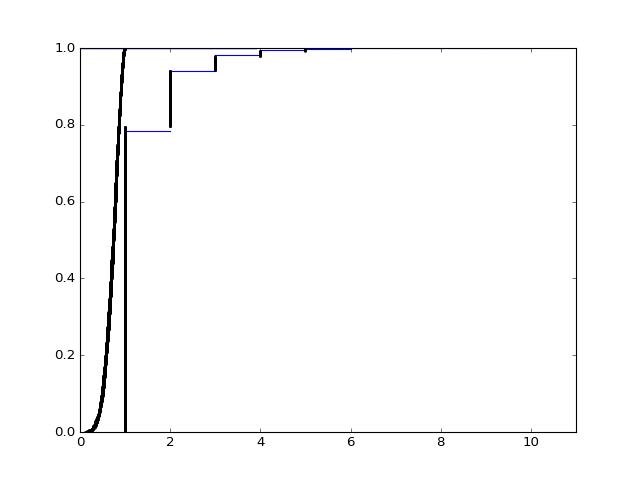

In [176]:
def logarithmic(p):
    accept = False
    while(not accept):
        i = int(math.log(random.random())/math.log(1-p))+1
        accept = (random.random() <= (1-p)/(i*p))

    return i

log_button = widgets.Button(description='Simulate')
log_p_selector = widgets.FloatSlider(min=0.5, max=0.99, value=.3, description='$p$')

fig_log_simulation, ax_log_simulation = plt.subplots()

def logarithmic_simulation(p):
    data = [logarithmic(p) for i in range(1000)]
    max_x = 10
    vals = np.arange(1, max_x+1)
    probs = [(1-p)**i / (-math.log(p)*i) for i in vals]
    cum_probs = np.cumsum(probs)

    clear_output()
    ax_log_simulation.clear()
        
    for line in zip(zip(vals[:-1], vals[1:]), cum_probs):
        ax_log_simulation.plot(line[0], [line[1]]*2, 'b')
            
    x_ecdf, y_ecdf = ecdf(data)
    ax_log_simulation.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)
    plt.ylim(0, 1)
    plt.xlim(0, max_x+1)
    
    display(fig_log_simulation)


log_button.on_click(lambda b: logarithmic_simulation(log_p_selector.value))
display(log_button)

_ = interact(logarithmic_simulation, p=log_p_selector)

When dealing with continuous distributions, the acceptance-rejection algorithm is essentially unchanged, although now it deals with densities rather than with probability masses: as in the discrete case, let $X$, $Y$, $f_X$, and $f_Y$ denote, respectively, the random variable we aim at simulating and a random variable which we can efficiently simulate, and lthe corresponding densities. Given a constant $c$ such that $\frac{f_X(x)}{f_Y(x) \leq c$ for each $x$, the algorithm implementing the acceptance-rejection technique has the following form:

- do
  - $y$ = simulate($Y$)
  - $u$ = random()
  - accept = $\left( u < \frac{f_X(y)}{c f_Y(y)} \right)$
- while(!accept)
- return $y$

The previously introduced proof can be trivially transferred to this new form of the algorithm, so that also in this case it ca be proven that the random variable $X_G$ accounting for the values returned by this algorithm will be distributed according to a density equal to $f_X$, and the number of iterations of the algorithm will follow a geometric distribution of parameter $\frac{1}{c}$.

As an application example, consider the following density:

$$
f_X(x) = \frac{1}{B(a, b)} x ^{a-1} (1-x)^{b-1} \mathrm I_{(0, 1)}(x),
$$

with $a, b \in \mathbb R^+$ and $B(a, b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$ is the so-called beta function. A random variable whose density can be expressed as $f_X$ is said to follow the _beta distribution_. In order to simulate this distribution using the acceptance-rejection technique it is necessary to find a second random variable which we known how to simulate and the corresponding value for the constant $c$. Concerning the first choice, note that as the domain of the beta distribution is $[0, 1]$ it is possible to refer to a random variable $U$ uniformly distributed over the same set. In this case, being $f_U(x)=1$, $c$ should satisfy the relation

$$
\frac{f_X(x)}{f_U(x)} = f_X(x) \leq c.
$$

Thus, a strategy for chosing $c$ consists in setting it to the maximum value of $f_X$, which in turn can be found through nullifying the first derivative of the density. This derivative assumes the form

$$
f_X'(x) = \frac{1}{B(a, b)} \left( (a-1) x^{a-2} (1-x)^{b-1} + (b-1) x^{a-1} (1-x)^{b-2} \right),
$$

and $f_X'(x) = 0$ if and only if $(a-1)(1-x) = (b-1) x$, which in turn is equivalent to

$$
x = \frac{a-1}{a+b-2}.
$$

This implies that

$$
c = f_X\left( \frac{a-1}{a+b-2} \right)
  = \frac{1}{B(a, b)} \left( \frac{a-1}{a+b-2} \right) \left( \frac{b-1}{a+b-2} \right).
$$

Finally,

$$
\frac{f_X(x)}{c f_U(x)} = \frac{\frac{1}{B(a, b)} x ^{a-1} (1-x)^{b-1}}{\frac{1}{B(a, b)} \left( \frac{a-1}{a+b-2} \right) \left( \frac{b-1}{a+b-2} \right)}
= \left( x \frac{a+b-2}{a-1} \right) \left( (1-x) \frac{a+b-2}{b-1} \right)
$$

Summing up, the acceptance-rejection technique for the beta distribution translates to the following algorithm:

- do
  - $u$ = random()
  - $u_{\mathrm{acc}}$ = random()
  - accept = $\left( u_{\mathrm{acc}} \leq \left( u \frac{a+b-2}{a-1} \right) \left( (1-u) \frac{a+b-2}{b-1} \right) \right)$
- while(!accept)
- return $u$

The following cell implements this algorithm.

In [231]:
def beta(a, b):
    accept = False
    while not accept:
        u = random.random()
        u_acc = random.random()
        accept = (u_acc <= (u*(a+b-2)/(a-1))**(a-1) * ((1-u)*(a+b-2)/(b-1))**(b-1))
    return u

In order to test this implementation we can set up a function that accepts a value for $a$ and $b$ and produces a graph comparing the c.d.f. of the corresponding beta distribution and the empirical c.d.f. obtained from a set of 500 simulated values from the same distribution.

In [226]:
def simulate_beta(a, b):
    plt.figure()
    
    data = [beta(a, b) for i in range(500)]
    
    x_ecdf, y_ecdf = ecdf(data)
    plt.plot(x_ecdf, y_ecdf, 'ko', markersize=2, alpha=.7)

    vals = np.arange(0, 2, .01)
    cdfs = map(lambda x: stats.beta.cdf(x, a, b), vals)
    plt.plot(vals, cdfs, 'b')
    plt.show()

The following cell tests the simulation for $a=2$ and $b=5$.

<IPython.core.display.Javascript object>


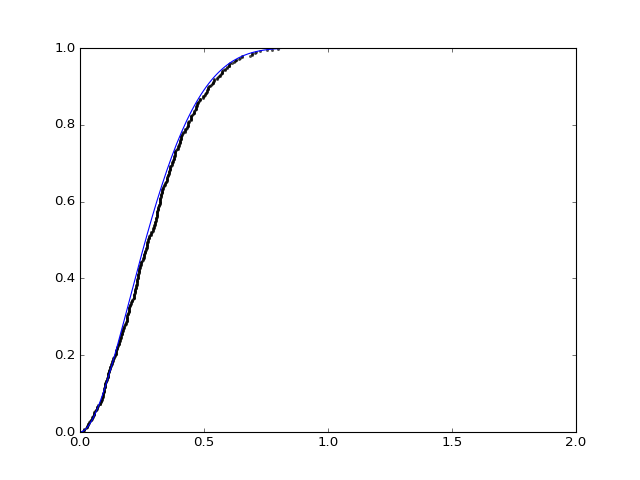

In [228]:
simulate_beta(2, 5)

Analogously, the following cell tests the values $a = b = 9$.

<IPython.core.display.Javascript object>


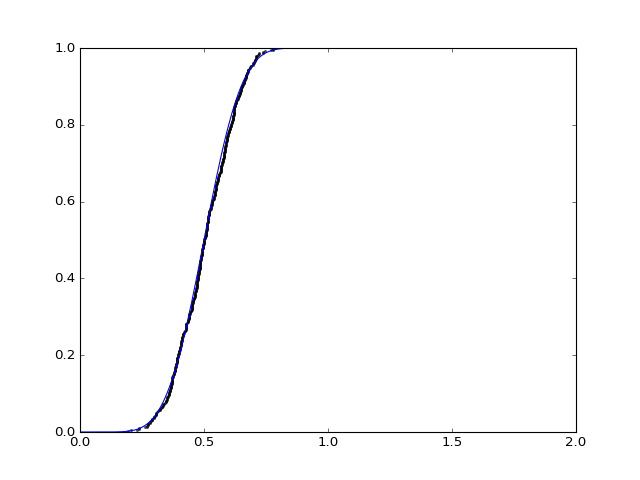

In [229]:
simulate_beta(9, 9)

Things are different if we consider $a = 0.9$ and $b = 0.5$:

<IPython.core.display.Javascript object>


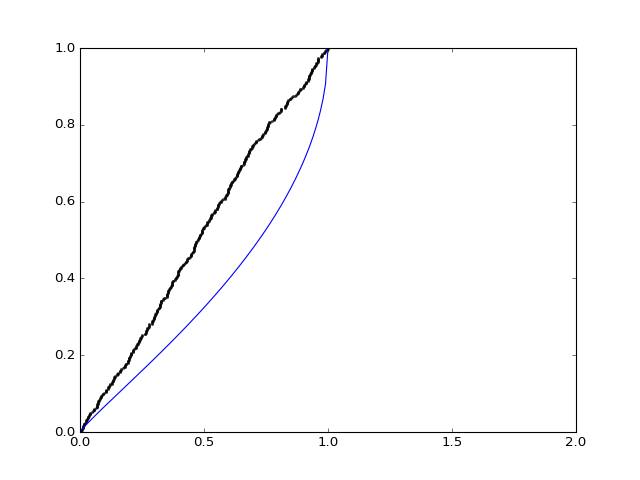

In [230]:
simulate_beta(.9, .5)

In this case the tests fails because for this choice of parameters we obtain a value $c < 1$: 

In [239]:
from scipy import special

def c(a, b):
    return special.beta(a, b) * ((a-1)/(a+b-2)) * ((b-1)/(a+b-2))

c(.9, .5)

0.29649440549928935

The acceptance-rejection tecnique can be applied exploiting a different choice of the companion distribution. Consider for instance a random variable $Y$ with density $f_Y(y) = a y^{a-1} \mathrm I_{(0, 1)}(y)$, so that

$$
\frac{f_X(x)}{f_Y(x)} =  \frac{1}{a B(a, b)} (1-x)^{b-2} \leq \frac{1}{a B(a, b)} =: c,
$$

and the ratio $\frac{f_x(x)}{c f_Y(x)}$ amounts to $(1-x)^{b-1}$. Finally, note that as $F_Y(y) = y^a$, the random variable $Y$ can be easily simulated through a direct application of the inverse transformation method obtaining $Y = \sqrt[a]{U}$, and $X$ can therefore be simulated as follows:

- do
  - $u$ = random()
  - $y = \sqrt[a]{u}$
  - $u_{\mathrm{acc}}$ = random()
  - accept = $\left( u_{\mathrm{acc}} \leq (1-y)^{b-1} \right)$
- while(!accept)
- return $y$

## Exercises ##

- The simulation of a Bernoulli distribution exploiting the plug-in principle through generation of a geometric random variable can be optimized in function of the involved parameter $p$. Indeed when $p > \frac{1}{2}$ the procedure can be made more efficient if it generates the subsequent number of successes rather than the number of insuccesses. Modify the proposed implementation in order to apply this enhancement.